In [1]:
# To ignore warnings

import warnings
warnings.filterwarnings('ignore')

# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading & Understanding Data

In [3]:
original_data = pd.read_csv('day.csv')
original_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
original_data.shape

(730, 16)

In [5]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
original_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Findings

1. Data has 730 rows & 16 columns
2. Out of 16 columns

    a. '11' are integer type
    
    b. '4' are float type
    
    c. '1' is object type i.e. 'dteday'  
    
3. 'cnt' is our target variable
4. Columns not useful for analysis

    a. 'instant': Just a number
    
    b. 'dteday' : Since, we already have month & year. Therefore, it won't make any sense in our analysis
    
    c. 'casual' : Part of our target variable
    
    d. 'registered' : Part of our target variable    
    
5. These remaining 12 columns can be broadly divided into two major categories

    a. Numeric Variables: 'temp', 'atemp','hum','windspeed', 'cnt'
    
    b. Categorical Variables: 'season','year','mnth','holiday','weekday','workingday','weathersit'

# Data Cleaning & Manipulation

In [7]:
# Creating a copy of the original data so that we can always retrive original data if something goes wrong
import copy
data = copy.deepcopy(original_data)

## Fixing rows & columns

### Checking null Values %

In [8]:
# Column-wise
col_null_percentages = data.apply(lambda row: row.isnull().sum() / len(row) * 100)
print(col_null_percentages.sort_values(ascending = False))

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


In [9]:
# Row-wise
row_null_percentages = data.apply(lambda row: row.isnull().sum() / len(row) * 100, axis=1)
print(row_null_percentages.sort_values(ascending = False))

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64


### Dropping irrelevant columns

In [10]:
cols_to_be_dropped = ['instant', 'dteday','casual', 'registered']
data.drop(cols_to_be_dropped, axis=1, inplace=True)
print(data.head())
print(data.shape)

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600  
(730, 12)


## Checking duplicates

In [11]:
no_of_duplicates = data.duplicated().sum()
print(no_of_duplicates)

0


## Checking for Unknow values

In [12]:
for col in data.columns:
    print(f'value count of {col}')
    print(data[col].value_counts(),'\n')

value count of season
3    188
2    184
1    180
4    178
Name: season, dtype: int64 

value count of yr
0    365
1    365
Name: yr, dtype: int64 

value count of mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 

value count of holiday
0    709
1     21
Name: holiday, dtype: int64 

value count of weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 

value count of workingday
1    499
0    231
Name: workingday, dtype: int64 

value count of weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64 

value count of temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 

value count of atemp
32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.

We can see that there are no values like 'none', 'other', etc.

## Checking Outliers

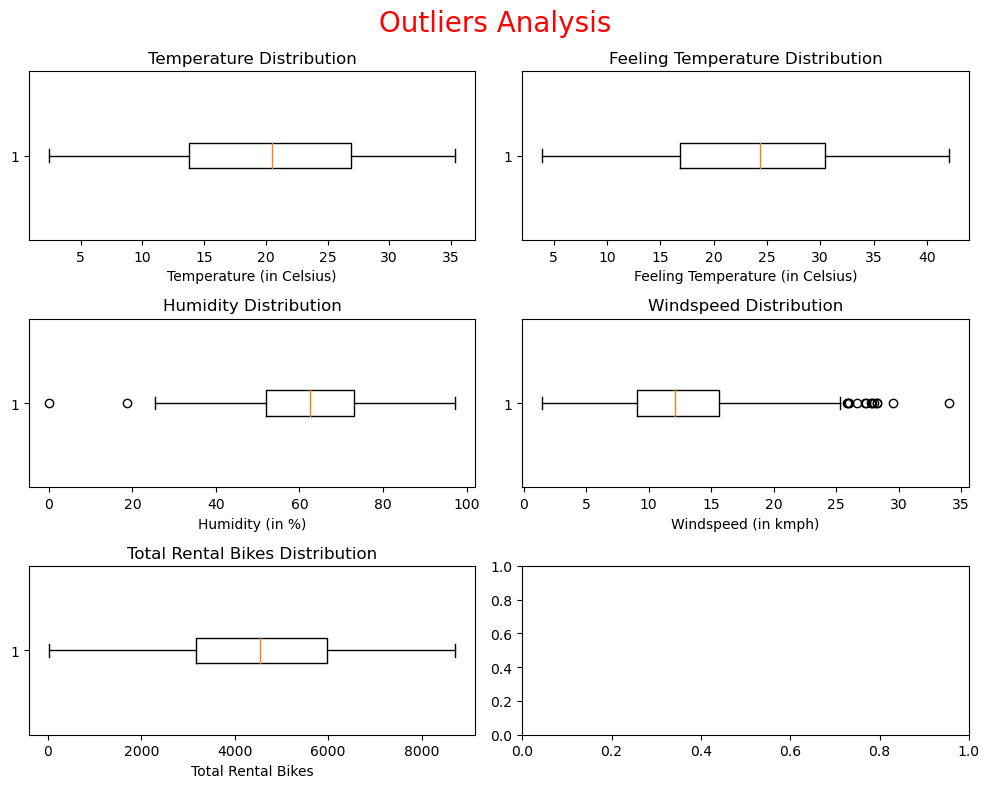

In [18]:
# These variables to be checked: 'temp', 'atemp','hum','windspeed' & 'cnt'

# create a figure with 6 subplots
fig_1, axs_1 = plt.subplots(nrows=3, ncols=2, figsize=(10,8))

# plot data in each subplot
axs_1[0, 0].boxplot(data['temp'], vert=False)
axs_1[0, 0].set_title('Temperature Distribution')
axs_1[0, 0].set_xlabel('Temperature (in Celsius)')

axs_1[0, 1].boxplot(data['atemp'], vert=False)
axs_1[0, 1].set_title('Feeling Temperature Distribution')
axs_1[0, 1].set_xlabel('Feeling Temperature (in Celsius)')

axs_1[1, 0].boxplot(data['hum'], vert=False)
axs_1[1, 0].set_title('Humidity Distribution')
axs_1[1, 0].set_xlabel('Humidity (in %)')

axs_1[1, 1].boxplot(data['windspeed'], vert=False)
axs_1[1, 1].set_title('Windspeed Distribution')
axs_1[1, 1].set_xlabel('Windspeed (in kmph)')

axs_1[2, 0].boxplot(data['cnt'], vert=False)
axs_1[2, 0].set_title('Total Rental Bikes Distribution')
axs_1[2, 0].set_xlabel('Total Rental Bikes')

# set figure title
fig_1.suptitle('Outliers Analysis', fontsize=20, color='r')

# adjust subplot spacing
plt.tight_layout()

plt.show()

As we can see that there are 2 major columns with 'Outliers' i.e. 'hum' & 'windspeed'. Therefore, let's remove the outliers from them.

In [19]:
# Checking data before removing outliers
data.shape

(730, 12)

In [20]:
def remove_outliers(database, cols_to_be_considered):
    
    # Data with concerned columns
    data_to_consider = database[cols_to_be_considered]
    
    q1 = data_to_consider.quantile(0.25)
    q3 = data_to_consider.quantile(0.75)
    IQR = q3 - q1
    
    lower_threshold = q1 - 1.5 * IQR
    upper_threshold = q3 + 1.5 * IQR
    
    # Extracting outliers
    outliers = (data_to_consider < lower_threshold) | (data_to_consider > upper_threshold)
    
    # Removing outliers
    cleaned_database = database[~(outliers).any(axis=1)]
    
    return cleaned_database

cols_with_outliers = ['hum','windspeed']
data_wo_outliers = remove_outliers(data, cols_with_outliers)
data_wo_outliers.shape

(716, 12)

From the shape of the data, we can analyse that there are total 14 outliers in total which is roughly 2%

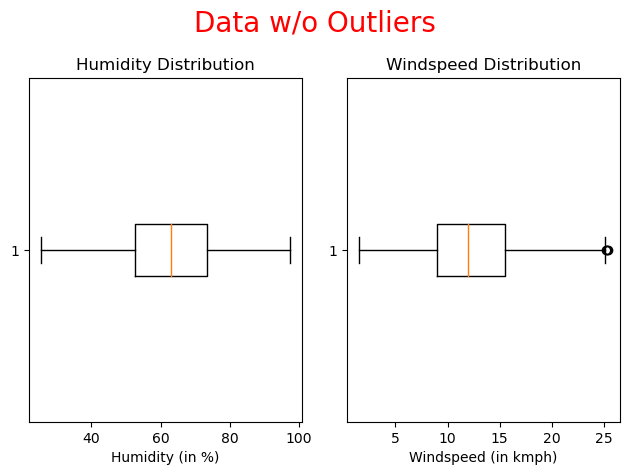

In [22]:
# create box plots for the 2 columns which had outliers
fig_2, axs_2 = plt.subplots(nrows=1, ncols=2)

axs_2[0].boxplot(data_wo_outliers['hum'], vert=False)
axs_2[0].set_title('Humidity Distribution')
axs_2[0].set_xlabel('Humidity (in %)')

axs_2[1].boxplot(data_wo_outliers['windspeed'], vert=False)
axs_2[1].set_title('Windspeed Distribution')
axs_2[1].set_xlabel('Windspeed (in kmph)')

# set figure title
fig_2.suptitle('Data w/o Outliers', fontsize=20, color='r')

# adjust subplot spacing
plt.tight_layout()

plt.show()

## Findings

1. There are no null values in the data
2. Dropping 4 irrelevant columns: 'instant', 'dteday','casual' & 'registered'
3. There are no duplicates in the data
4. There are no unknown values in the data
5. Majority of the columns have no outliers except the 'hum' & 'windspeed' from which we have removed the outliers.

# EDA

Data Types

    a. Numeric Variables    : 'temp', 'atemp','hum','windspeed', 'cnt'
    
    b. Categorical Variables: 'season','year','mnth','holiday','weekday','workingday','weathersit'

## Numeric Variables

<Figure size 1200x800 with 0 Axes>

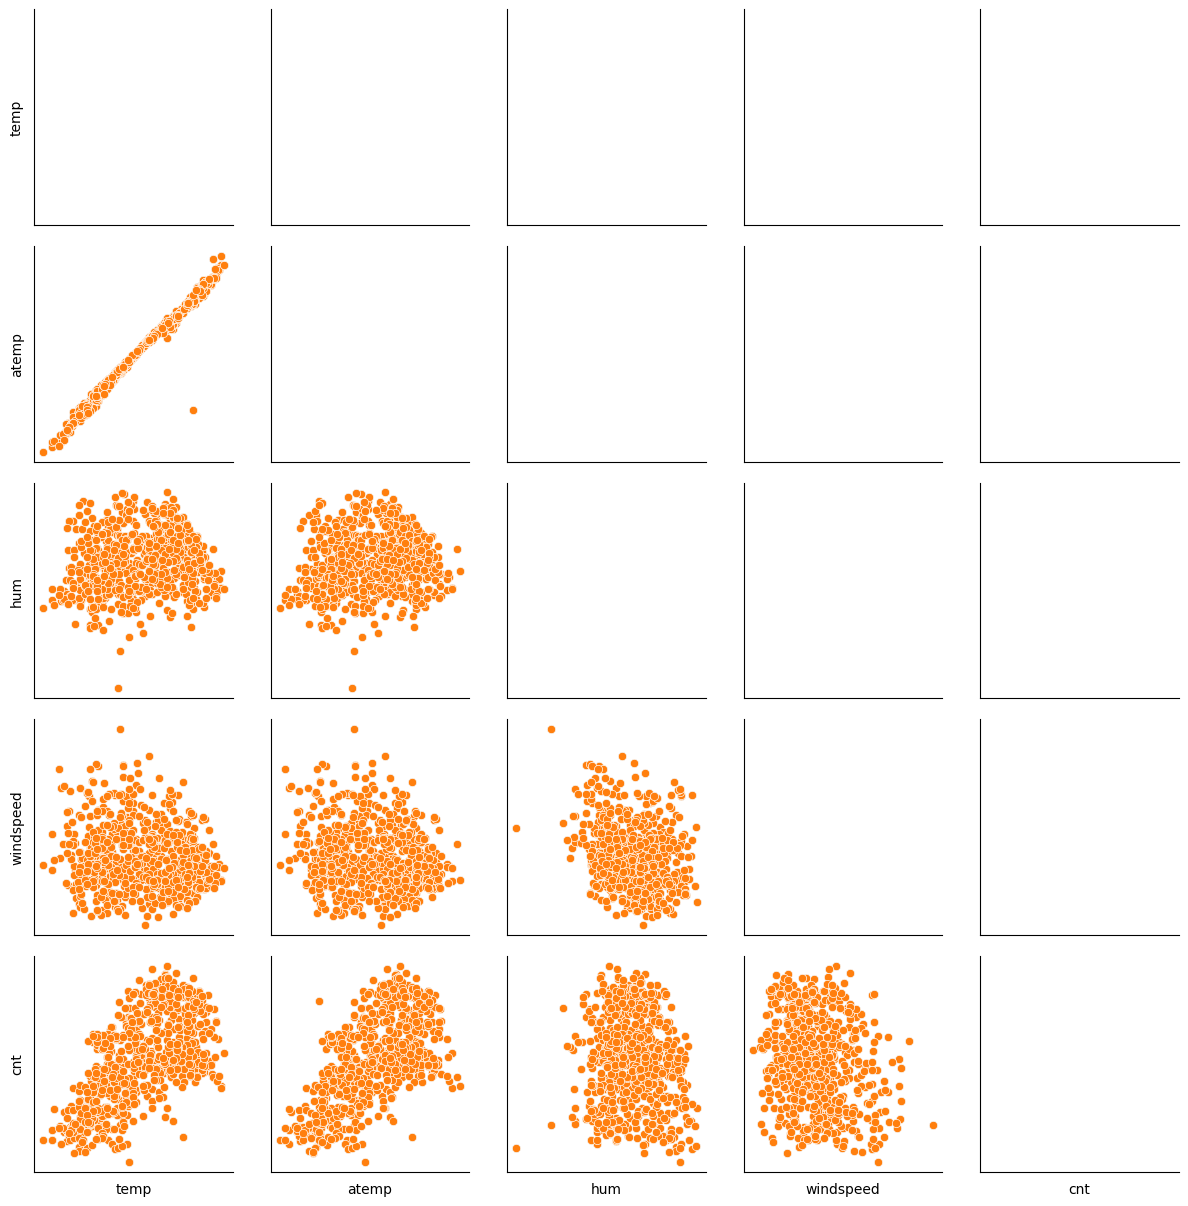

In [23]:
# Heatmap to understand colinearity b/w variables
plt.figure(figsize=(12,8))

numeric_variables = ['temp', 'atemp','hum','windspeed', 'cnt']
numeric_variables_df = data[numeric_variables]

# create a pair plot
pair_plot = sns.PairGrid(numeric_variables_df)
pair_plot.map_lower(sns.scatterplot)

# show only the upper triangle
pair_plot = pair_plot.map_lower(sns.scatterplot).set(xticks=[], yticks=[])

sns.despine()
plt.show()

As we can see that 'temp' & 'atemp' has very high correlation, therefore, we can drop one them which have lower correlation with the target variable 'cnt'.

To get the correlation, let's plot the heatmap of the correlation matrix

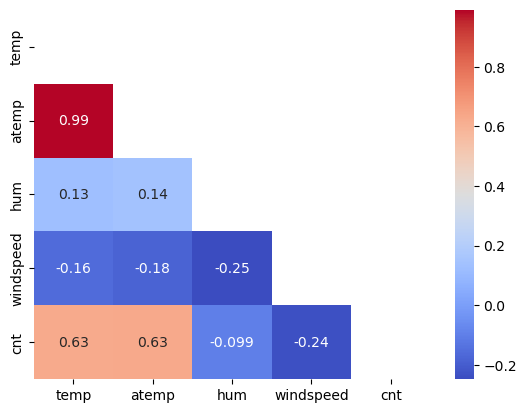

In [43]:
fig, ax = plt.subplots()

# This creates a matirx with all the values RHS to the diagonal is zero
upper_tri = np.triu(numeric_variables_df.corr())
                    
sns.heatmap(numeric_variables_df.corr(), cmap="coolwarm", annot = True, ax=ax, mask=upper_tri)
plt.show()

From above, we say that since both has equal correlation with 'cnt', we can drop either of them. Since, 'temp' is the actual temperature and 'atemp' is feel like temperature, therefore, it makes sense to keep 'temp' & drop 'atemp'

In [25]:
# Dropping 'atemp' column
data.drop('atemp', axis=1, inplace=True)

### Findings

1. We dropped 'atemp' to avoid multi-collinearity issue.
2. 'temp' & 'cnt' shows a good linear relationship which means it's going to be an important parameter.
3. Rest of the variables shows a weak linear relationship with the 'cnt' variable.

## Categorical Variables

'season','year','mnth','holiday','weekday','workingday','weathersit'

### Data Mapping

In [26]:
# Changing data values for better understanding

# Season
season_dict = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter',
}

# Mapping to get the real value
data['season'] = data['season'].map(season_dict)

# month

month_dict = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec',
}

# Mapping to get the real value
data['mnth'] = data['mnth'].map(month_dict)

# weekday
weekday_dict = {
    0: 'Sun',
    1: 'Mon',
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri',
    6: 'Sat',
}

# Mapping to get the real value
data['weekday'] = data['weekday'].map(weekday_dict)

# weathersit
weathersit_dict = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light_Snow',
    4: 'Heavy_Rain',
}
# Mapping to get the real value
data['weathersit'] = data['weathersit'].map(weathersit_dict)

In [27]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


### Box-Plot Analysis

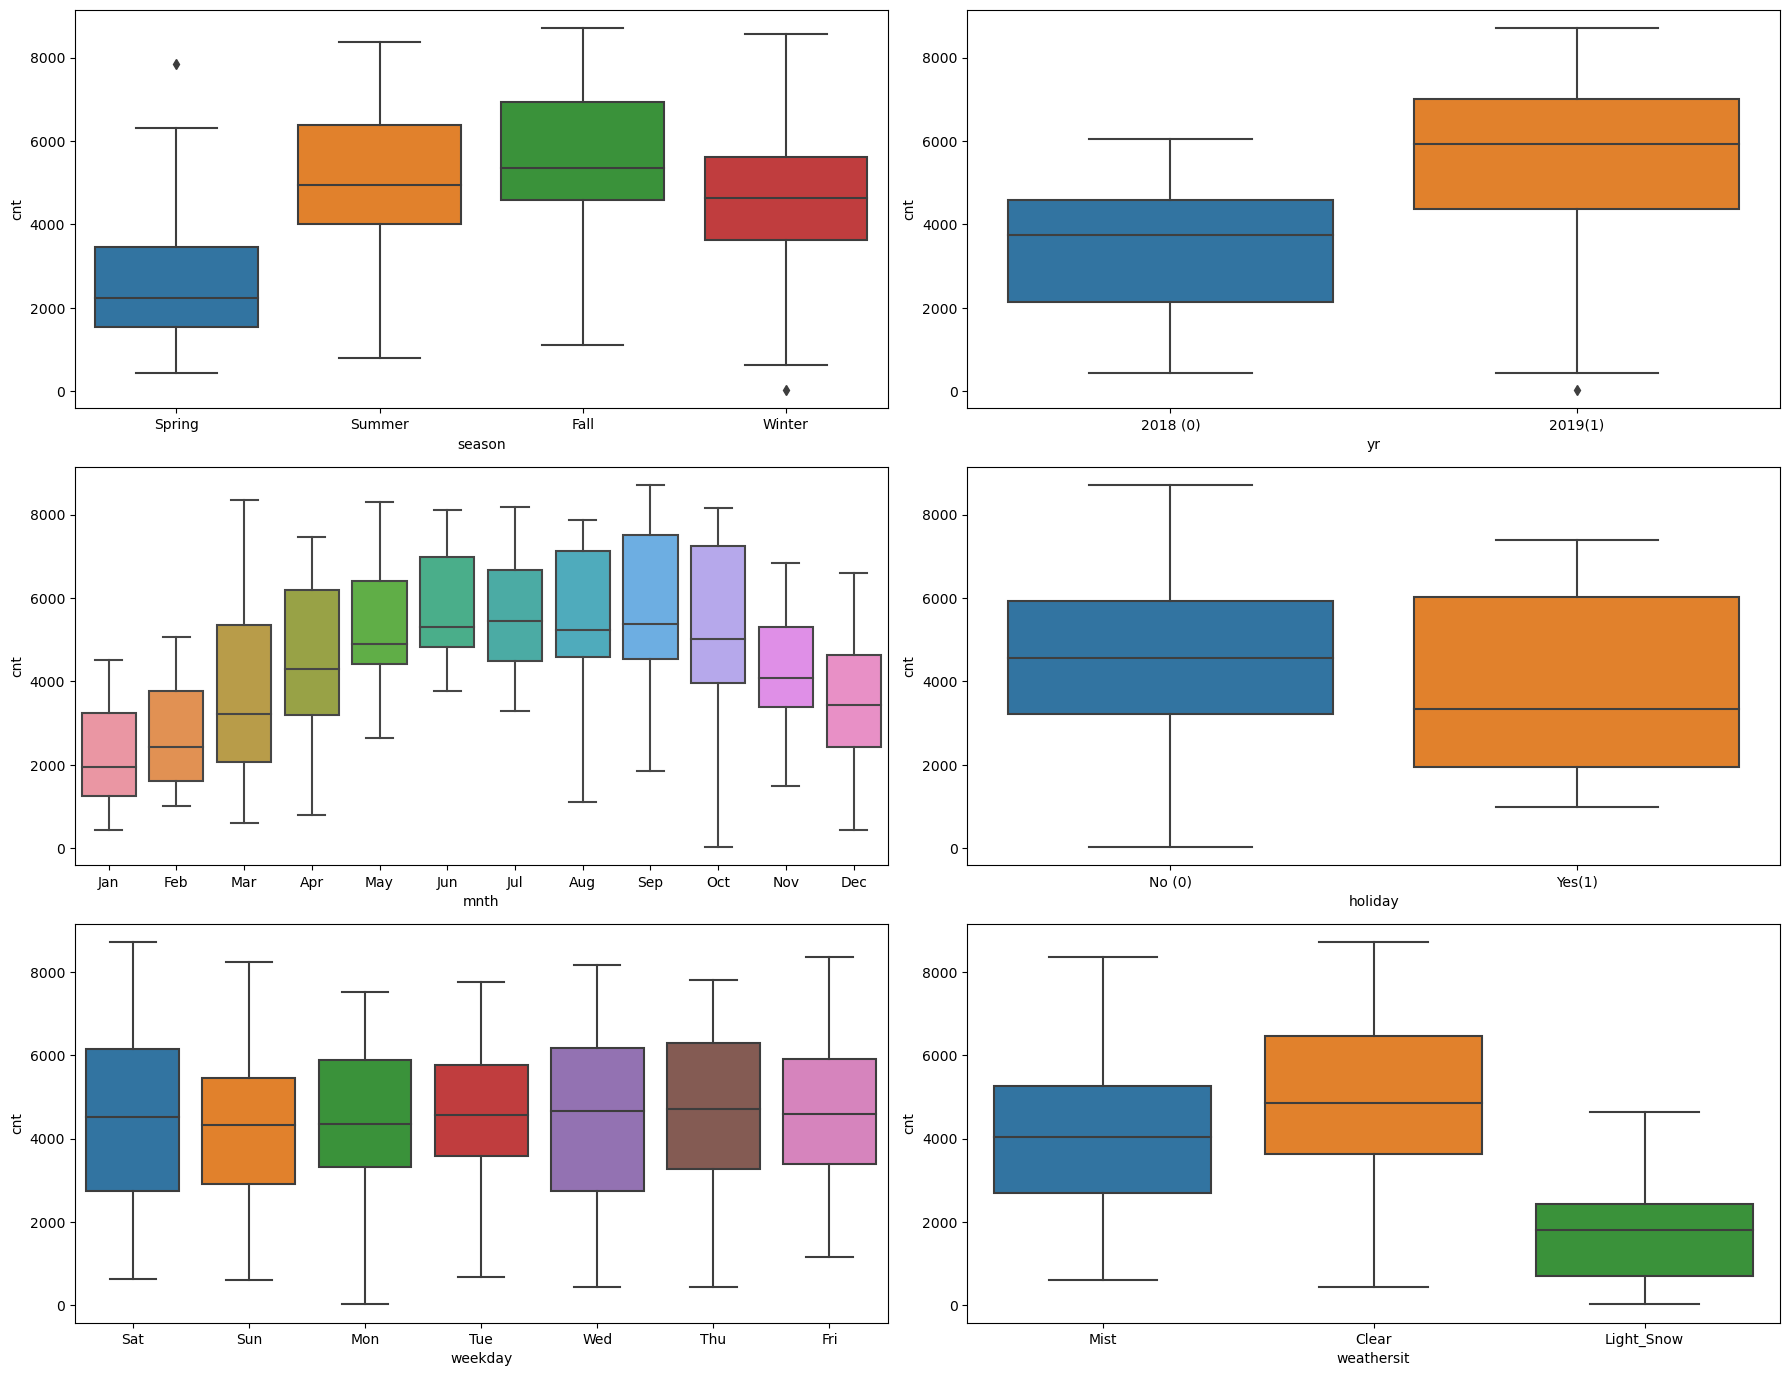

In [28]:
plt.figure(figsize=(18, 18))

plt.subplot(4,2,1)
sns.boxplot(data= data, x = 'season', y = 'cnt')

plt.subplot(4,2,2)
sns.boxplot(data= data, x = 'yr', y = 'cnt')
plt.xticks([0,1],['2018 (0)','2019(1)'])

plt.subplot(4,2,3)
sns.boxplot(data= data, x = 'mnth', y = 'cnt')

plt.subplot(4,2,4)
sns.boxplot(data= data, x = 'holiday', y = 'cnt')
plt.xticks([0,1],['No (0)','Yes(1)'])

plt.subplot(4,2,5)
sns.boxplot(data= data, x = 'weekday', y = 'cnt')

plt.subplot(4,2,6)
sns.boxplot(data= data, x = 'weathersit', y = 'cnt')

# adjust subplot spacing
plt.tight_layout()

plt.show()

### Findings

1. During summer & fall, bookings are much more as compare to spring & winter
2. No. of bookings increases in 2019 as compare to 2018
3. There is upward trend in booking from Jan to May, then, stays more of same till Oct and, then, again starts falling till Dec
4. No. of bookings on a 'non-holiday' day is more as compare to holidays
5. Bookings remains almost same through-out the week. No exceptional decrease or increase.
6. No. of bookings are highest on a clear day & lowest on light snow. There are no bookings when it rains heavily.

# Data Preparation

## Creating dummy data

Need to create dummy variables for 'season', 'weathersit', 'weekday' & 'mnth'

In [ ]:
'''
To Understand the values in 'weathersit' column, please refer this:

weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
'''

### Creating dummy variables

In [29]:
# Function to create dummy variables

def getDummies(database, column_name):
    
    # Creating dummy variables for all the categorical variables
    dummy_df = pd.get_dummies(database[column_name] , drop_first = True)
    
    # Concatenating dummy dataframe with the original data
    database = pd.concat([database, dummy_df], axis=1)
    
    # Dropping categorical column
    database.drop([column_name], axis=1, inplace=True)
    
    return database    

In [30]:
col_for_dummy_variables = ['season', 'weathersit', 'weekday', 'mnth']

# Checking value_count for each column & creating dummy variables
for column_name in col_for_dummy_variables:
    
    print('\n------ ' + column_name +' value count------')
    print(data[column_name].value_counts())
    data = getDummies(data, column_name)


------ season value count------
Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

------ weathersit value count------
Clear         463
Mist          246
Light_Snow     21
Name: weathersit, dtype: int64

------ weekday value count------
Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: weekday, dtype: int64

------ mnth value count------
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64


In [31]:
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [32]:
data.shape

(730, 29)

## Train-Test Split

In [33]:
# Creating X & y for Data Spliting
X = data.drop('cnt', axis=1)
y = data['cnt']

In [34]:
X.shape

(730, 28)

In [35]:
y.shape

(730,)

In [36]:
from sklearn.model_selection import train_test_split

# This initializes the random number generator with a fixed seed value which determines the starting point of the sequence of random numbers
np.random.seed(0)

df_train_X, df_test_X, df_train_y, df_test_y = train_test_split(X, y, train_size=0.7, random_state=10)

In [37]:
# Training Data
print('\n--- X ---\n')
print(df_train_X.head())
print('\nShape: ',df_train_X.shape)

print('\n\n--- y ---\n')
print(df_train_y.head())
print('\nShape: ',df_train_y.shape)


--- X ---

     yr  holiday  workingday       temp      hum  windspeed  Spring  Summer  \
72    0        0           1  13.333897  49.6957   9.174042       1       0   
510   1        0           0  28.392500  73.2500  13.332464       0       1   
700   1        0           0  14.247500  82.3333   8.333393       0       0   
264   0        0           1  25.761653  90.2083   8.584375       0       0   
577   1        0           1  29.417500  67.7500   9.458993       0       0   

     Winter  Light_Snow  ...  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  
72        0           0  ...    0    0    0    0    0    1    0    0    0    0  
510       0           0  ...    0    0    0    0    0    0    1    0    0    0  
700       1           0  ...    1    0    0    0    0    0    0    0    0    0  
264       0           0  ...    0    0    0    0    0    0    0    0    0    1  
577       0           0  ...    0    0    0    0    0    0    0    0    0    0  

[5 rows x 28 columns]

Sha

In [38]:
# Test Data
print('\n--- X ---\n')
print(df_test_X.head())
print('\nShape: ',df_test_X.shape)

print('\n\n--- y ---\n')
print(df_test_y.head())
print('\nShape: ',df_test_y.shape)


--- X ---

     yr  holiday  workingday       temp      hum  windspeed  Spring  Summer  \
566   1        0           0  24.429153  86.5417  14.291100       0       0   
374   1        0           1  12.656536  64.6522  12.565984       1       0   
181   0        0           1  29.622500  39.6250   6.874736       0       0   
529   1        0           1  26.581653  56.9583  17.000111       0       1   
233   0        0           1  28.358347  47.0000  18.542250       0       0   

     Winter  Light_Snow  ...  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  
566       0           1  ...    0    0    0    1    0    0    0    0    0    0  
374       0           0  ...    0    0    1    0    0    0    0    0    0    0  
181       0           0  ...    0    0    0    1    0    0    0    0    0    0  
529       0           0  ...    0    0    0    0    1    0    0    0    0    0  
233       0           0  ...    0    0    0    0    0    0    0    0    0    0  

[5 rows x 28 columns]

Sha

# Feature Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler

# Initializing MinMaxScaler object
scaler = MinMaxScaler()

# Creating a list of columns to be scaled
features_to_scale = ['temp', 'hum', 'windspeed']

# Performing feature scaling
df_train_X[features_to_scale] = scaler.fit_transform(df_train_X[features_to_scale])

df_train_X.head()

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Light_Snow,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
72,0,0,1,0.298094,0.393891,0.236118,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
510,1,0,0,0.778657,0.694105,0.364071,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
700,1,0,0,0.327249,0.809877,0.210252,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
264,0,0,1,0.694699,0.910249,0.217975,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
577,1,0,1,0.811368,0.624004,0.244886,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

## Model Building using RFE - Feature Selection

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
# Creating linear regression model object
lm = LinearRegression()

# It fits a linear regression Model to the training data
''' This method estimates the coefficients (or weights) of the linear regression model by minimizing the residual sum of squares 
between the predicted values and the actual values on the training data. '''
lm.fit(df_train_X, df_train_y)

# It initializes an RFE object with the specified arguments
''' 
Arguments:

-> estimator: This is the model that will be used by the RFE algorithm to select the most important features.
-> n_features_to_select: This is the number of features that will be selected by the RFE algorithm.

'''
rfe = RFE(estimator=lm, n_features_to_select=15)

# It fits the RFE estimator to the training data and selects the optimal number of features
'''
The RFE algorithm is a feature selection method that selects the most important features based on their contribution to the model's performance. It works
by recursively removing less important features and re-fitting the model until the desired number of features is reached.

'''
rfe = rfe.fit(df_train_X, df_train_y)

In [46]:
# This create a list of all features/ columns with whether a particular column is selected or not (True & False) and it's ranking where '1' indicates selected variables
list(zip(df_train_X.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 12),
 ('Winter', True, 1),
 ('Light_Snow', True, 1),
 ('Mist', True, 1),
 ('Mon', False, 6),
 ('Sat', False, 2),
 ('Sun', False, 9),
 ('Thu', False, 13),
 ('Tue', False, 11),
 ('Wed', False, 14),
 ('Aug', False, 4),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 5),
 ('Mar', False, 8),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', True, 1)]

In [47]:
cols_selected_by_RFE = df_train_X.columns[rfe.support_]
cols_selected_by_RFE

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Winter',
       'Light_Snow', 'Mist', 'Dec', 'Feb', 'Jan', 'Jul', 'Nov', 'Sep'],
      dtype='object')

## Model Building using Stats Model for Statistics

In [48]:
# creating a dataframe with the columns selected by the RFE for stats model
df_train_X_rfe = df_train_X[cols_selected_by_RFE]
df_train_X_rfe.head()

,yr,holiday,temp,hum,windspeed,Spring,Winter,Light_Snow,Mist,Dec,Feb,Jan,Jul,Nov,Sep
72,0,0,0.298094,0.393891,0.236118,1,0,0,0,0,0,0,0,0,0
510,1,0,0.778657,0.694105,0.364071,0,0,0,0,0,0,0,0,0,0
700,1,0,0.327249,0.809877,0.210252,0,1,0,1,1,0,0,0,0,0
264,0,0,0.694699,0.910249,0.217975,0,0,0,1,0,0,0,0,0,1
577,1,0,0.811368,0.624004,0.244886,0,0,0,0,0,0,0,0,0,0


In [49]:
df_train_X_rfe.shape

(510, 15)

In [65]:
''' Don't add constant in the same data variable rather create new as we 'll be needing that for VIF '''


import statsmodels.api as sm

# Method to build model
def build_model(train_data_X, train_data_y):

    # Adding a constant variable
    train_data_X_sm = sm.add_constant(train_data_X)

    # Creating a linear model
    model = sm.OLS(train_data_y, train_data_X_sm).fit()

    return model, train_data_X_sm



from statsmodels.stats.outliers_influence import variance_inflation_factor

# Method to get VIF
def get_vif(train_data_X):
    vif = pd.DataFrame()
    X = train_data_X
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### 1st Model

#### Creating Model

In [66]:
lm_1, X_data_train_sm_1 = build_model(df_train_X_rfe, df_train_y)
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Fri, 02 Jun 2023   Prob (F-statistic):          1.59e-186
Time:                        15:32:29   Log-Likelihood:                -4121.3
No. Observations:                 510   AIC:                             8273.
Df Residuals:                     495   BIC:                             8336.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2912.8716    211.153     13.795      0.000    2498.005    3327.738
yr          2123.5137     71.104     29.865      0.000    1983.812    2263.216
holiday     -670.2615    197.904     -3.387      0.001   -1059.097    -281.426
temp        2969.5969    273.745     10.848      0.000    2431.751    3507.443
windspeed  -1149.2326    226.740     -5.068      0.000   -1594.725    -703.741
Spring      -857.1183    158.350     -5.413      0.000   -1168.239    -545.997
Winter       664.4985    119.042      5.582      0.000     430.608     898.389
Light_Snow -2252.2484    202.892    -11.101      0.000   -2650.883   -1853.613
Mist        -716.8387     76.225     -9.404      0.000    -866.603    -567.074
Dec         -694.5907    153.905     -4.513      0.000    -996.979    -392.202
Feb         -491.7749    188.465     -2.609      0.009    -862.065    -121.485
Jan         -747.2930    188.720     -3.960      0.000   -1118.083    -376.503
Jul         -452.9931    159.505     -2.840      0.005    -766.383    -139.603
Nov         -731.7705    163.194     -4.484      0.000   -1052.409    -411.132
Sep          351.3877    130.025      2.702      0.007      95.919     606.857
==============================================================================
Omnibus:                       83.886   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.532
Skew:                          -0.775   Prob(JB):                     3.96e-55
Kurtosis:                       6.064   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Calculating VIF

Imp: Don't feed data with constant variable. Need to give that data which we had prior to adding constant variable

In [67]:
vif = get_vif(df_train_X_rfe)
vif

,Features,VIF
2,temp,4.97
3,windspeed,4.77
4,Spring,4.20
5,Winter,2.61
10,Jan,2.29
9,Feb,2.14
0,yr,2.05
12,Nov,1.84
8,Dec,1.64
7,Mist,1.55


Since, all the p-values are < 0.05. Therefore, we need to remove values as per VIF. Since, 'hum' has very high VIF. Therefore, we need to remove that first

#### Dropping 'hum' variables with high VIF

In [53]:
df_train_X_rfe.drop(['hum'], axis=1, inplace=True)
df_train_X_rfe.head()

,yr,holiday,temp,windspeed,Spring,Winter,Light_Snow,Mist,Dec,Feb,Jan,Jul,Nov,Sep
72,0,0,0.298094,0.236118,1,0,0,0,0,0,0,0,0,0
510,1,0,0.778657,0.364071,0,0,0,0,0,0,0,0,0,0
700,1,0,0.327249,0.210252,0,1,0,1,1,0,0,0,0,0
264,0,0,0.694699,0.217975,0,0,0,1,0,0,0,0,0,1
577,1,0,0.811368,0.244886,0,0,0,0,0,0,0,0,0,0


### 2nd Model

In [54]:
df_train_X_rfe.shape

(510, 14)

#### Creating Model

In [68]:
lm_2, X_data_train_sm_2 = build_model(df_train_X_rfe, df_train_y)
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Fri, 02 Jun 2023   Prob (F-statistic):          1.59e-186
Time:                        15:33:37   Log-Likelihood:                -4121.3
No. Observations:                 510   AIC:                             8273.
Df Residuals:                     495   BIC:                             8336.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2912.8716    211.153     13.795      0.000    2498.005    3327.738
yr          2123.5137     71.104     29.865      0.000    1983.812    2263.216
holiday     -670.2615    197.904     -3.387      0.001   -1059.097    -281.426
temp        2969.5969    273.745     10.848      0.000    2431.751    3507.443
windspeed  -1149.2326    226.740     -5.068      0.000   -1594.725    -703.741
Spring      -857.1183    158.350     -5.413      0.000   -1168.239    -545.997
Winter       664.4985    119.042      5.582      0.000     430.608     898.389
Light_Snow -2252.2484    202.892    -11.101      0.000   -2650.883   -1853.613
Mist        -716.8387     76.225     -9.404      0.000    -866.603    -567.074
Dec         -694.5907    153.905     -4.513      0.000    -996.979    -392.202
Feb         -491.7749    188.465     -2.609      0.009    -862.065    -121.485
Jan         -747.2930    188.720     -3.960      0.000   -1118.083    -376.503
Jul         -452.9931    159.505     -2.840      0.005    -766.383    -139.603
Nov         -731.7705    163.194     -4.484      0.000   -1052.409    -411.132
Sep          351.3877    130.025      2.702      0.007      95.919     606.857
==============================================================================
Omnibus:                       83.886   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.532
Skew:                          -0.775   Prob(JB):                     3.96e-55
Kurtosis:                       6.064   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Calculating VIF

In [69]:
vif = get_vif(df_train_X_rfe)
vif

,Features,VIF
2,temp,4.97
3,windspeed,4.77
4,Spring,4.20
5,Winter,2.61
10,Jan,2.29
9,Feb,2.14
0,yr,2.05
12,Nov,1.84
8,Dec,1.64
7,Mist,1.55


Since, all the variables have p-value w/n the range i.e. < 0.05 and have VIF value < 5. Therefore, this is our final model.

In [ ]:
X_data_train_sm_2.shape

(510, 15)

In [72]:
X_data_train_sm_2.head()

,const,yr,holiday,temp,windspeed,Spring,Winter,Light_Snow,Mist,Dec,Feb,Jan,Jul,Nov,Sep
72,1.0,0,0,0.298094,0.236118,1,0,0,0,0,0,0,0,0,0
510,1.0,1,0,0.778657,0.364071,0,0,0,0,0,0,0,0,0,0
700,1.0,1,0,0.327249,0.210252,0,1,0,1,1,0,0,0,0,0
264,1.0,0,0,0.694699,0.217975,0,0,0,1,0,0,0,0,0,1
577,1.0,1,0,0.811368,0.244886,0,0,0,0,0,0,0,0,0,0


# Model Interpretation

## Coefficient Interpretation

In [114]:
round(lm_2.params,2).sort_values(ascending=False)

temp          2969.60
const         2912.87
yr            2123.51
Winter         664.50
Sep            351.39
Jul           -452.99
Feb           -491.77
holiday       -670.26
Dec           -694.59
Mist          -716.84
Nov           -731.77
Jan           -747.29
Spring        -857.12
windspeed    -1149.23
Light_Snow   -2252.25
dtype: float64

* These coefficent can be divided into two groups:
    * Positively impact cnt: const, yr, temp, Winter
    * Negatively impact cnt: holiday, windspeed, Spring, Light_Snow, Mist, Dec, Feb, Jan, Jul, Nov & Sep    
    
* Positve coefficent 'll increase the 'cnt' (no. of bike bookings) whereas Negative coefficient 'll decrease the 'cnt'

## F-statistics

* The value of F-statistic & Prob (F-statistic) signifies the overall fit of the model. Higher it is, better is our model.
* Since, p-value of all the coefficients are < 0.00 & the value of F-statistic is also quite descent. Therefore, we can say that the overall fit of the model is good.

# Model Assumptions Verification

To analyse whether this model satisfies all the assumptions of MLR

## Linear Relationship b/w X & Y

<Figure size 1200x800 with 0 Axes>

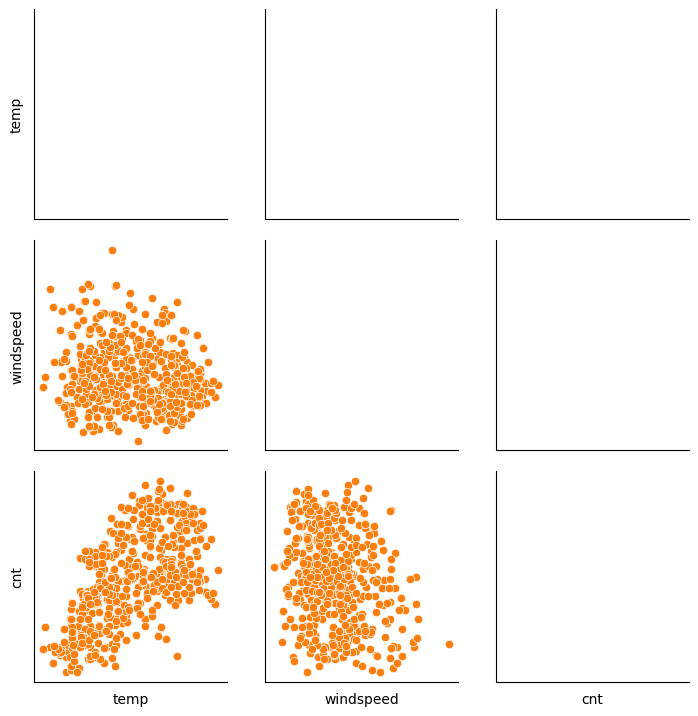

In [63]:
# Heatmap to understand colinearity b/w variables
plt.figure(figsize=(12,8))

numeric_variables = ['temp','windspeed']
numeric_variables_df_X = df_train_X_rfe[numeric_variables]
numeric_variables_df = pd.concat([numeric_variables_df_X, df_train_y], axis=1)

# create a pair plot
pair_plot = sns.PairGrid(numeric_variables_df)
pair_plot.map_lower(sns.scatterplot)

# show only the upper triangle
pair_plot = pair_plot.map_lower(sns.scatterplot).set(xticks=[], yticks=[])

sns.despine()
plt.show()

We can observe that 'cnt' has good linear relationship with 'temp' & weak linear relationship with 'windspeed'.

## Error Terms Normally Distributed

In [74]:
# Predicting 'y-value' of training data (with constant)
df_train_y_pred = lm_2.predict(X_data_train_sm_2)
df_train_y_pred.shape

(510,)

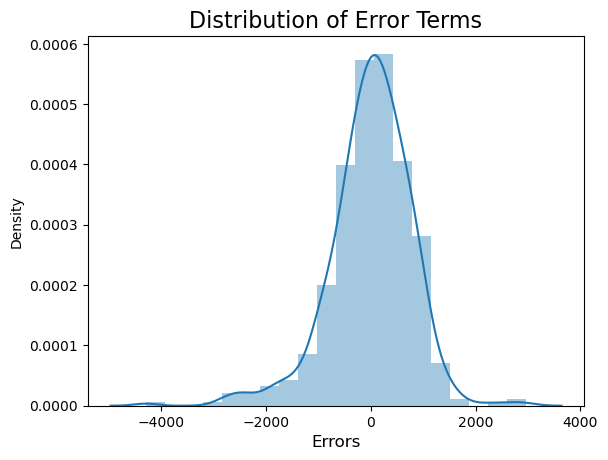

In [75]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((df_train_y - df_train_y_pred), bins = 20)
plt.title('Distribution of Error Terms', fontsize = 16)            
plt.xlabel('Errors', fontsize = 12)                         
plt.show()

This indicates that error terms are normally distributed. Therefore, our model is correct and 'll make good predictions.

## Residual Plot

This checks for multiple assumptions:
1. Error Terms has Constant variance
2. There are no outliers
3. Error Terms are independent of each other 
4. No non-linearity in residuals

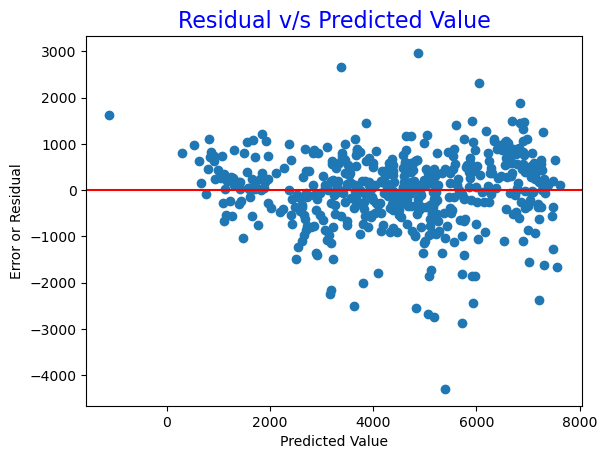

In [116]:
# Final

error = df_train_y - df_train_y_pred
plt.scatter( df_train_y_pred ,error)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Value')
plt.ylabel('Error or Residual')
plt.title('Residual v/s Predicted Value', color='b', fontsize=16)
plt.show()

This indicates that:

1. All the residuals are evenly spread & there is no pattern. Therefore, there is 
    - No non-linearity in residuals
    - Error terms are independent of each other
    - Error terms has constant variance
2. There are no outliers.

## Multi-collinearity

In [78]:
vif = get_vif(df_train_X_rfe)
vif

,Features,VIF
2,temp,4.97
3,windspeed,4.77
4,Spring,4.20
5,Winter,2.61
10,Jan,2.29
9,Feb,2.14
0,yr,2.05
12,Nov,1.84
8,Dec,1.64
7,Mist,1.55


SInce, all the VIF values are below 5, therefore, we can confidently say that there is no multi-collinearity.

# Making Predictions

In [79]:
df_test_X.head()

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Light_Snow,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
566,1,0,0,24.429153,86.5417,14.291100,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
374,1,0,1,12.656536,64.6522,12.565984,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
181,0,0,1,29.622500,39.6250,6.874736,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
529,1,0,1,26.581653,56.9583,17.000111,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
233,0,0,1,28.358347,47.0000,18.542250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df_test_X.shape

(220, 28)

In [81]:
df_test_y.head()

566    4459
374    3598
181    5362
529    7363
233    4758
Name: cnt, dtype: int64

In [82]:
df_test_y.shape

(220,)

## Applying scaling on test data

We are using 'transform' & not 'fit_transform' because we don't want our model to learn anything from the test data rather just use the learned parameters from the training data and apply that on test data for feature scaling

In [88]:
features_to_scale = ['temp', 'hum', 'windspeed']
df_test_X[features_to_scale] = scaler.transform(df_test_X[features_to_scale])
df_test_X.head()

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Light_Snow,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
566,1,0,0,0.652175,0.863516,0.393568,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
374,1,0,1,0.276477,0.584521,0.340487,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
181,0,0,1,0.817910,0.265533,0.165370,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
529,1,0,1,0.720868,0.486457,0.476922,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
233,0,0,1,0.777567,0.359532,0.524373,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Creating required 'x_test' Data

In [89]:
# Making test data using columns choosen by the final model
x_test = df_test_X[df_train_X_rfe.columns]
x_test.head()

,yr,holiday,temp,windspeed,Spring,Winter,Light_Snow,Mist,Dec,Feb,Jan,Jul,Nov,Sep
566,1,0,0.652175,0.393568,0,0,1,0,0,0,0,1,0,0
374,1,0,0.276477,0.340487,1,0,0,0,0,0,1,0,0,0
181,0,0,0.817910,0.165370,0,0,0,0,0,0,0,1,0,0
529,1,0,0.720868,0.476922,0,0,0,0,0,0,0,0,0,0
233,0,0,0.777567,0.524373,0,0,0,0,0,0,0,0,0,0


In [90]:
x_test.shape

(220, 14)

## Predictions

In [91]:
x_test_sm = sm.add_constant(x_test)
y_test_pred = lm_2.predict(x_test_sm)

In [92]:
y_test_pred.head()

566    3815.540805
374    3861.700996
181    4698.692581
529    6628.977281
233    4619.306066
dtype: float64

In [93]:
y_test_pred.shape

(220,)

# Model Evaluation

## R² & Adjusted R²

In [96]:
# R²
from sklearn.metrics import r2_score
r_2_value = r2_score(y_true=df_test_y, y_pred=y_test_pred)
r_2_value

0.8206604038880282

In [97]:
# Adjusted R²

'''
Adjusted R² = 1 - (1 - R²)(N - 1)
                  ---------------
                  N - p - 1
                  
Where, 
    N: No. of rows
    p: No. of predictor variable
'''
N = x_test.shape[0]
p = x_test.shape[1]
r_2 = r_2_value

adjusted_r_square = 1 - ((1-r_2)*(N-1))/(N-p-1)
print(adjusted_r_square)

0.8084128217145277


On the training data, we have '0.84' & '0.83' values for r square & adjusted r square. Since, these values are quite close, therefore, we can say that our model is doing good predictions.

## Regression plot

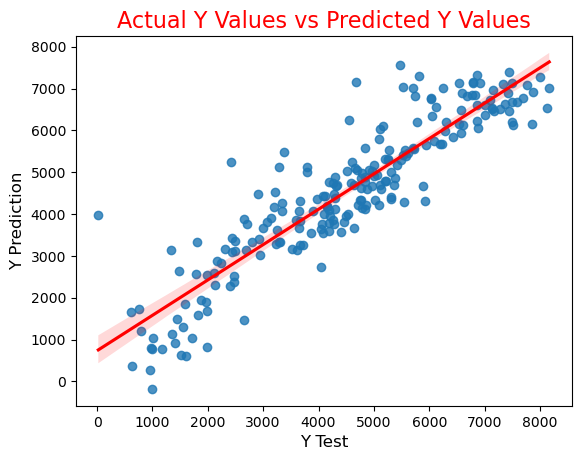

In [111]:
plt.figure()
sns.regplot(x=df_test_y, y=y_test_pred, fit_reg=True, line_kws={'color':'r'})

plt.title('Actual Y Values vs Predicted Y Values', fontsize = 16, color='r')               
plt.xlabel('Y Test', fontsize = 12)                   
plt.ylabel('Y Prediction', fontsize = 12)
plt.show()

As we can see that most of the points lie around 'Line of Perfect Fit' and the points forming a good linear pattern, therefore, we can confidently say that our model is making good predictions.

## Comparision of R² & Adjusted R² values of Train & Test data

                      R²    Adjusted R²
    Training Data    0.84     0.83
    Test Data        0.82     0.80

Since, R² & Adjusted R² values of both Train & Test data is almost same. Therefore, we can conclude that we have a good model and it 'll make good predictions

# Conclusion

* The company should focus on these top three parameters, in the same order as given below which is based on their coefficient values, which positively impacts our target variable 'cnt' 
    * temp
    * yr
    * winter
    
* The company should also focus on these top three parameters, in the same order as given below, which negatively impacts our target variable 'cnt'
    * Light_Snow
    * Windspeed
    * Spring 